## Legendary Pokemon Project

For this project I'm using a Pokemon Dataset, which contains detailed information about Pokemons. The end goal here is to apply some Classifications Models and check If it can (accurately) classify a Pokemon as Legendary/Non-Legendary based on their characteristics.

### 0 - Importing the Libraries/Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1 - Exploratory Data Analysis

#### 1.1 - Quick look at the dataset

In [2]:
df = pd.read_csv('C:\Personal_Projects\Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
# Only the Type 2 Column has Null Values. This is because some Pokemons only have one Type (e.g Charmander is an only fire Type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 66.4+ KB


In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#### 1.2 - Data Analysis + Visualization

65


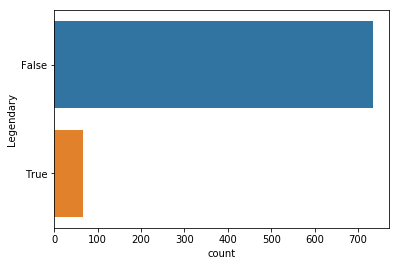

In [5]:
# From the 800 Pokemons, 65 are Legendary (8.12%)
print(df[df['Legendary'] == True]['Legendary'].count())
sns.countplot(y = df['Legendary']);

In [6]:
# From the top 20 Pokemons with the highest Total Stats 16 are Legendary. 
df[['Name', 'Total', 'Legendary']].sort_values('Total', ascending=False).head(20)

,Name,Total,Legendary
426,RayquazaMega Rayquaza,780,True
164,MewtwoMega Mewtwo Y,780,True
163,MewtwoMega Mewtwo X,780,True
422,KyogrePrimal Kyogre,770,True
424,GroudonPrimal Groudon,770,True
552,Arceus,720,True
712,KyuremWhite Kyurem,700,True
711,KyuremBlack Kyurem,700,True
409,SalamenceMega Salamence,700,False
413,MetagrossMega Metagross,700,False


Generation
5    71773
1    70851
3    69796
4    55541
2    44338
6    35783
Name: Total, dtype: int64


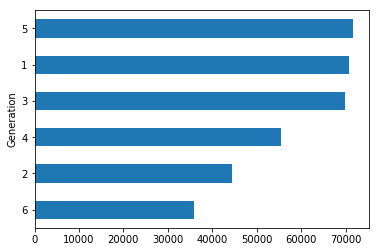

In [7]:
# Generation 5 Pokemons are the ones with the highest Total stats.
print(df.groupby(['Generation'])['Total'].sum().sort_values(ascending = False))
df.groupby('Generation')['Total'].sum().sort_values(ascending = True).plot(kind = 'barh')

Generation
3    18
5    15
4    13
6     8
1     6
2     5
Name: Legendary, dtype: int32


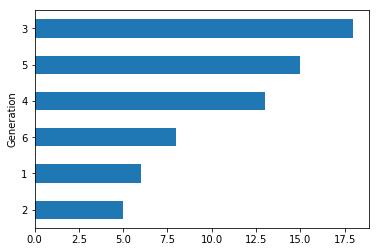

In [8]:
# Generation 3 is the one with the majority of Legendary Pokemons
print(df.groupby(['Generation'])['Legendary'].sum().astype(int).sort_values(ascending = False))
df.groupby(['Generation'])['Legendary'].sum().astype(int).sort_values(ascending = True).plot(kind = 'barh')

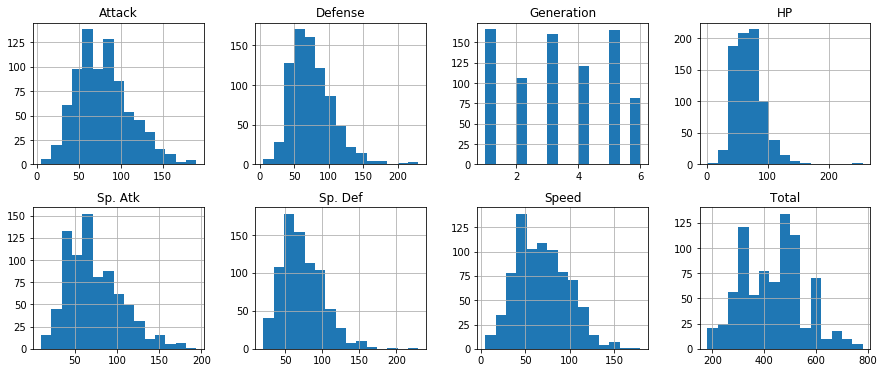

In [9]:
# Histogram to analyze all the numerical features from the dataset.
numerical = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

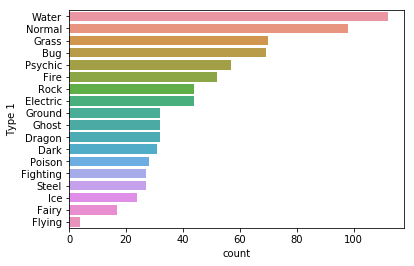

In [10]:
# Higher number of Water and Normal Pokemons.
sns.countplot(y = df['Type 1'], order=df['Type 1'].value_counts().index)

### 2 - Feature Engineering

In [11]:
# Since I'll be only working with (relevant) Numerical Features, columns=['#', 'Name', 'Type 1', 'Type 2', 'Generation'] will be removed.
df = df.drop(['#', 'Name', 'Type 1', 'Type 2', 'Generation'], 1)
df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,318,45,49,49,65,65,45,False
1,405,60,62,63,80,80,60,False
2,525,80,82,83,100,100,80,False
3,625,80,100,123,122,120,80,False
4,309,39,52,43,60,50,65,False


In [12]:
#Converting Legendary from Bool to Int (True = 1 & False = 0) 
df['Legendary'] = df['Legendary'].apply(lambda x: 1 if x == True else 0)
df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,318,45,49,49,65,65,45,0
1,405,60,62,63,80,80,60,0
2,525,80,82,83,100,100,80,0
3,625,80,100,123,122,120,80,0
4,309,39,52,43,60,50,65,0


 ### 3 - Classification Models and Evaluation

- I decided to create a model using different Machine Learning Metods and check the difference in accuracy between them.

#### 3.1 - Pre Processing

In [13]:
y = df['Legendary']
X = df.drop(['Legendary'], axis = 1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

### 3.2 K-Nearest Neighbours (KNN)

In [15]:
# Using Grid Search I was able to fit the trainning sets, in the KNN model, with the parameters that would return the best accuracy.
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2, algorithm='ball_tree', leaf_size=1, n_jobs=-1, weights='uniform')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
           weights='uniform')

In [16]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [17]:
# A 95.55% of accuracy, not bad at all!
print(best_accuracy)
print(best_parameters)

0.9553571428571429
{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'uniform'}


In [18]:
y_pred = classifier.predict(X_test)

In [19]:
# Check how the model predicted the Legendary/Non-Legendary Pokemon by using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

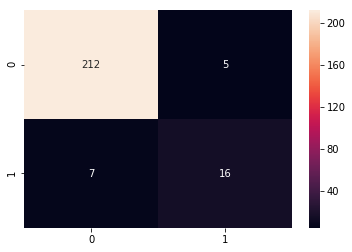

In [20]:
# Visualizing the Confusion Matrix Results
import seaborn as sns
sns.heatmap(cm,annot=True,fmt=".0f")

- From 240 Pokemon, the KNN Classification ML Model got it right 212/217 Non Legendary and 16/23 Legendary 

#### Kernel SVM

In [21]:
from sklearn.svm import SVC
svm_classifier= SVC(kernel = 'rbf', random_state = 0, gamma='auto')
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm_classifier, X = X_train, y = y_train, cv = 10)
print(round(accuracies.mean(),4))
print(round(accuracies.std(),4))

0.9268
0.0049


- Kernel SVM's accuracy: 92.68%

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0, solver='lbfgs')
lr_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr_classifier, X = X_train, y = y_train, cv = 10)
print(round(accuracies.mean(),4))
print(round(accuracies.std(),4))

0.9359
0.0287


- Logistic Regression's accuracy: 93.59%

#### Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb_classifier, X = X_train, y = y_train, cv = 10)
print(round(accuracies.mean(),4))
print(round(accuracies.std(),4))

0.9288
0.0325


- Naive Bayes' accuracy: 92.88%

#### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'gini', max_features='auto', min_samples_leaf=4, min_samples_split=15, random_state = 4)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')

In [28]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'criterion':['gini','entropy'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[1,2,3,4,5]}
grid_search = GridSearchCV(estimator = dt_classifier,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

c:\users\henrique proba\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
# Decision Tree Model has a 97.14% !
print(best_accuracy)
print(best_parameters)

0.9714285714285714
{'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 15, 'random_state': 4}


In [30]:
dt_y_pred = dt_classifier.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, dt_y_pred)

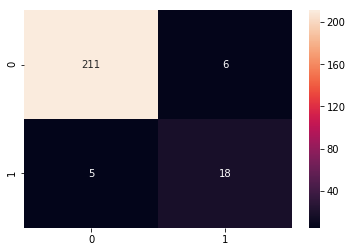

In [32]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt=".0f")

 - From 240 Pokemon, the Decision Tree Classification Model got it right 211/217 Non Legendary and 18/23 Legendary 

#### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [34]:
# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf_classifier, X = X_train, y = y_train, cv = 10)
print(round(accuracies.mean(),4))
print(round(accuracies.std(),4))

0.9304
0.0242


- Random Forest's accuracy: 93.04%